# Yleisten kirjastojen aineistokartoitus - pilottien ja Vaskin vertailua

In [1]:
import numpy as np
import operator
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib_venn import venn3, venn3_circles

def readIds(idFile):
    ids = set()
    with open(idFile, 'rt') as f:
        for line in f:
            ids.add(line.strip())
    return ids


# argumenttina lista tiedostonimistä, toinen lista otsikoista
def venn(data, labels, title, filename):   
    subsets = list(map(readIds, data))
    plt.figure(figsize=(10,10))
    plt.title(title)
    venn3(subsets, labels)
    c = venn3_circles(subsets=subsets, linestyle='solid')
    c[0].set_ls('dotted')  # Line style
    c[1].set_ls('dashed')
    c[2].set_lw(1.0)       # Line width
    plt.savefig(filename)
    plt.show()

Piirretään ensin Vennin diagrammi pilottien ja Vaskin aineistosta. Kaavio kuvaa eri kirjastoille yhteisiä ja erillisiä tietueita. Ensimmäisessä versio kattaa kaikki tietueet, jälkimmäisessä poikastietueita ei ole huomioitu eli mukana ovat vain osakohteettomat ja emotietueet.

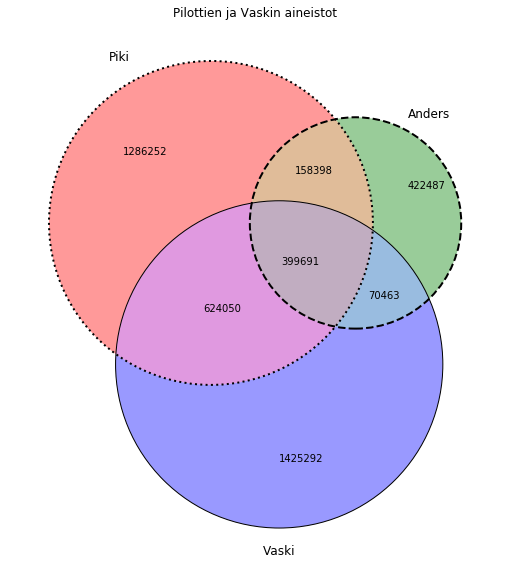

In [2]:
venn(["./data/PIKI_ids.txt", "./data/ANDERS_ids.txt", "./data/VASKI_ids.txt"],
     ["Piki", "Anders", "Vaski"],
     "Pilottien ja Vaskin aineistot",
     "venn_pilotit_ja_vaski.svg")

Sama ilman poikastietueita. Tässä mukana siis osakohteettomat ja emotietueet.

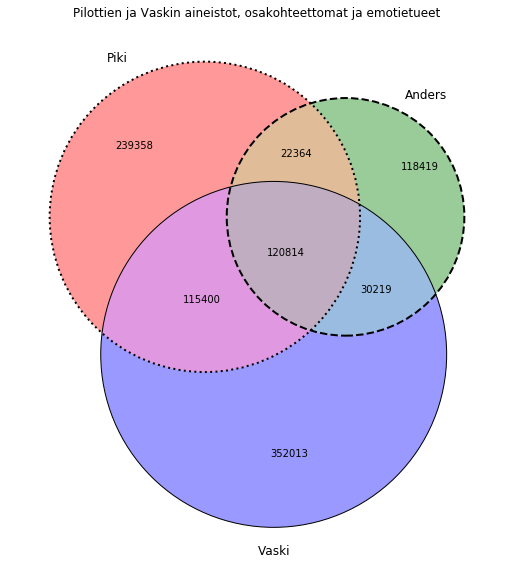

In [3]:
venn(["./data/PIKI_nonsub_ids.txt", "./data/ANDERS_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Piki", "Anders", "Vaski"],
     "Pilottien ja Vaskin aineistot, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_osakohteettomat.svg")

Pilotit ja Vaski osana Melindaa.

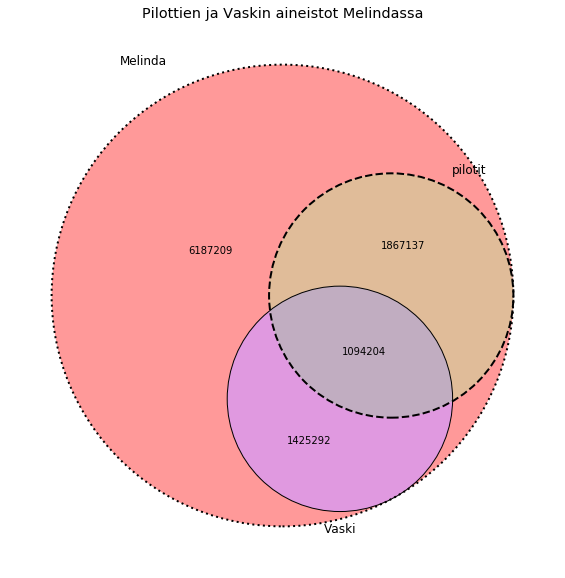

In [42]:
venn(["./data/MELINDA_ids.txt", "./data/PILOTIT_ids.txt", "./data/VASKI_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistot Melindassa",
     "venn_pilotit_ja_vaski_melindassa.svg")

Sama ilman poikastietueita, mukana osakohteettomat ja emot.

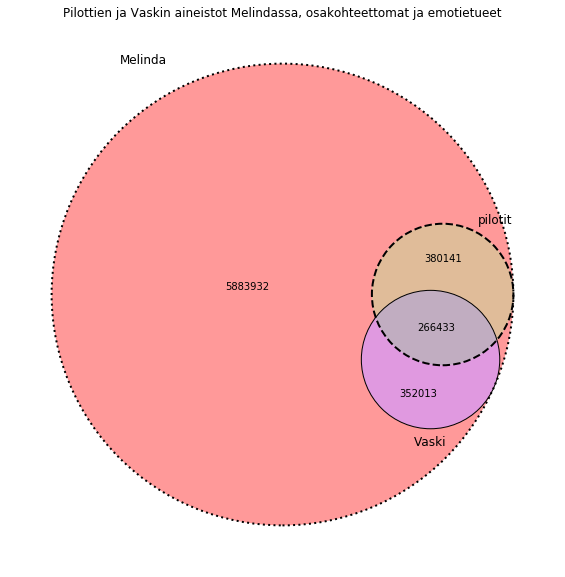

In [5]:
venn(["./data/MELINDA_nonsub_ids.txt", "./data/PILOTIT_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistot Melindassa, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_melindassa_osakohteettomat.svg")

Pilotit ja Vaskin Melindaan yhdistyvä ja uutena tullut aineisto.

Tämä kuva tulee tarvittaessa piirtää uusiksi, sillä pinta-alat vääristyvät pallojen ollessa täysin pyöreitä.

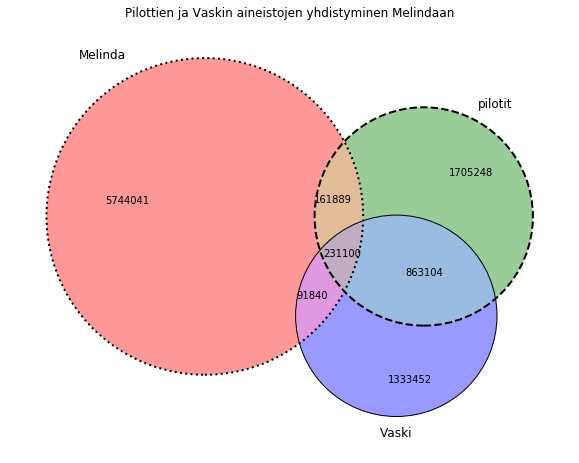

In [ ]:
venn(["./data/MUUT_ids.txt", "./data/PILOTIT_ids.txt", "./data/VASKI_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistojen yhdistyminen Melindaan",
     "venn_pilotit_ja_vaski_yhdistyminen.svg")

Edellinen ilman osakohteita, mukana osakohteettomat ja emotietueet.

In [ ]:
venn(["./data/MUUT_nonsub_ids.txt", "./data/PILOTIT_nonsub_ids.txt", "./data/VASKI_nonsub_ids.txt"],
     ["Melinda", "pilotit", "Vaski"],
     "Pilottien ja Vaskin aineistojen yhdistyminen Melindaan, osakohteettomat ja emotietueet",
     "venn_pilotit_ja_vaski_yhdistyminen_osakohteettomat.svg")

Vrt. Henrin piirtämä kuva, jossa pinta-alat oikein: ![title](kaaviot/melinda_aineistot.svg_final.png)

## Aineistojen kielet

In [2]:
kielikoodit = pd.read_csv("./kielet/kielikoodit.csv", names=['koodi', 'kieli_fin', 'kieli_eng', 'huomautus'], skiprows=1)

## Aineistojen julkaisuvuodet

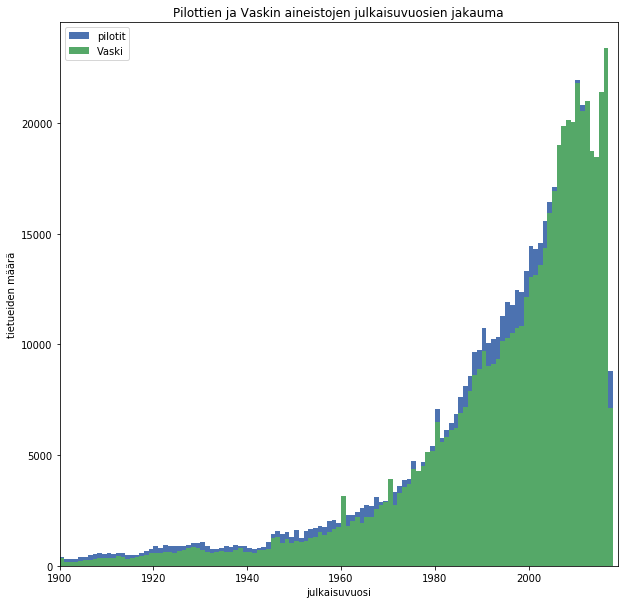

In [2]:
# Julkaisuvuosien tutkimista

PILOTIT_VUODET = "./data/PILOTIT-VUODET.txt"
VASKI_VUODET = "./data/VASKI-VUODET.txt"


def readYearsToList(file):
    years = []
    with open(file, 'rt') as f:
        for line in f:
            try:
                year = int(line.strip())
                years.append(year)
            except:
                pass
    return years


def plotYears(yearList1, yearList2, library1, library2):
    plt.style.use('seaborn-deep')
    bins = np.arange(1900, 2019, 1) # fixed bin size
    plt.figure(figsize=(10,10))
    plt.xlim([1900, 2019])
    plt.hist(yearList1, bins=bins, label=library1)
    plt.hist(yearList2, bins=bins, label=library2)
    plt.title('Pilottien ja Vaskin aineistojen julkaisuvuosien jakauma')
    plt.xlabel('julkaisuvuosi')
    plt.ylabel('tietueiden määrä')
    plt.legend(loc='upper left')
    plt.savefig("julkaisuvuodet_histogrammi.svg")
    plt.show()

vaskin_vuodet = readYearsToList(VASKI_VUODET)
pilottien_vuodet = readYearsToList(PILOTIT_VUODET)

plotYears(pilottien_vuodet, vaskin_vuodet, "pilotit", "Vaski")

Sitten kaavio yhdistymättömän aineiston julkaisuvuosista. Ensimmäisessä mukana *tietueet, joita ei ole muissa kirjastoissa*.

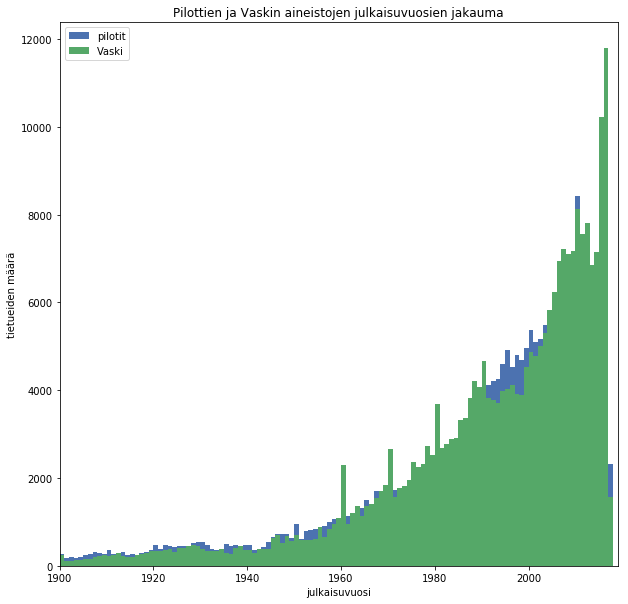

In [5]:
def plotYears(yearList1, yearList2, library1, library2):
    plt.style.use('seaborn-deep')
    bins = np.arange(1900, 2019, 1) # fixed bin size
    plt.figure(figsize=(10,10))
    plt.xlim([1900, 2019])
    plt.hist(yearList1, bins=bins, label=library1)
    plt.hist(yearList2, bins=bins, label=library2)
    plt.title('Pilottien ja Vaskin aineistojen julkaisuvuosien jakauma')
    plt.xlabel('julkaisuvuosi')
    plt.ylabel('tietueiden määrä')
    plt.legend(loc='upper left')
    plt.savefig("julkaisuvuodet_histogrammi.svg")
    plt.show()

PIKI_vuodet = readYearsToList("./data/onlyowner/PIKI_onlyowner-VUODET.txt")
ANDERS_vuodet = readYearsToList("./data/onlyowner/ANDERS_onlyowner-VUODET.txt")
VASKI_vuodet = readYearsToList("./data/onlyowner/VASKI_onlyowner-VUODET.txt")
PILOTIT_vuodet = readYearsToList("./data/onlyowner/PILOTIT_onlyowner-VUODET.txt")

plotYears(PILOTIT_vuodet, VASKI_vuodet, "pilotit", "Vaski")

Sitten sama kuva siten, että mukana ovat *tietueet, jotka eivät yhdistyneet muihin yleisiin kirjastoihin*.

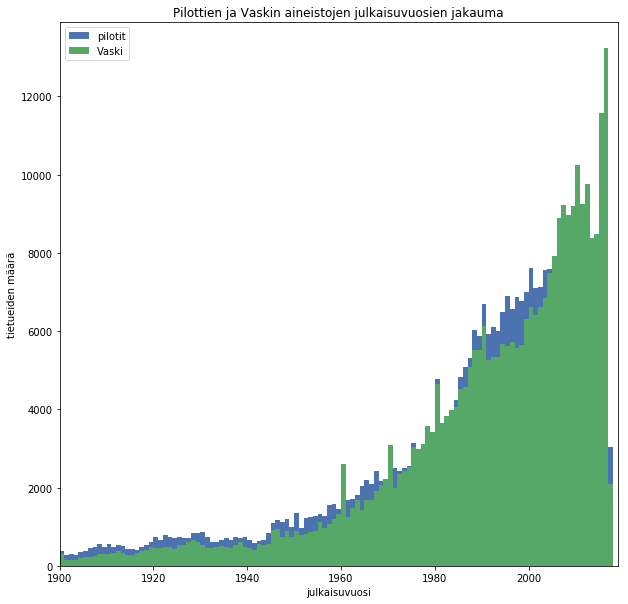

In [6]:
VASKI_vuodet = readYearsToList("./data/onlypublic/VASKI_onlypublic-VUODET.txt")
PILOTIT_vuodet = readYearsToList("./data/onlypublic/PILOTIT_onlypublic-VUODET.txt")

plotYears(PILOTIT_vuodet, VASKI_vuodet, "pilotit", "Vaski")

## Aineistojen sisällönkuvailu

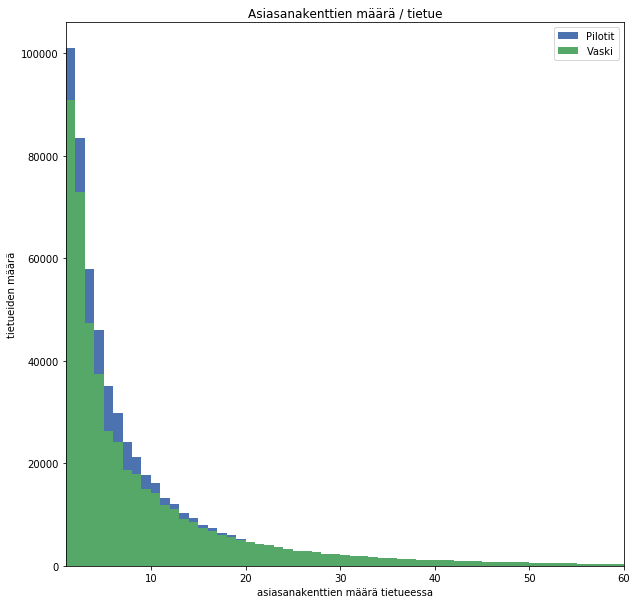

In [4]:
def plotShs(col1, col2):
    plt.style.use('seaborn-deep')
    bins = np.arange(min(col1)+1, max(col1), 1) # fixed bin size
    plt.figure(figsize=(10,10))
    plt.xlim([min(col1)+1, 60])
    #plt.hist(list(col), bins=bins, label='Asiasanoja / tietue')
    plt.hist(list(col1), bins=bins, label='Pilotit')
    plt.hist(list(col2), bins=bins, label='Vaski')
    plt.title('Asiasanakenttien määrä / tietue')
    plt.xlabel('asiasanakenttien määrä tietueessa')
    plt.ylabel('tietueiden määrä')
    plt.legend(loc='upper right')
    plt.savefig("asiasanakentat_histogrammi.svg")
    plt.show()

plotShs(pd.read_csv('./data/PILOTIT_fields_6XX.csv')['6XX'], pd.read_csv('./data/VASKI_fields_6XX.csv')['6XX'])

Luokitusten tutkiminen.

## Aineistotyypit

Eri aineistolajien jakaumat eri tietokannoissa. Tämä perustuu MARC 21:n aineistolajeihin (BK, SE, CF jne.). Esittämisen helpottamiseksi aineistot on jaoteltu kategorioihin *kirja-aineisto (BK)*, *musiikki (MU)*, *visuaalinen aineisto (VM)* ja *muut*.

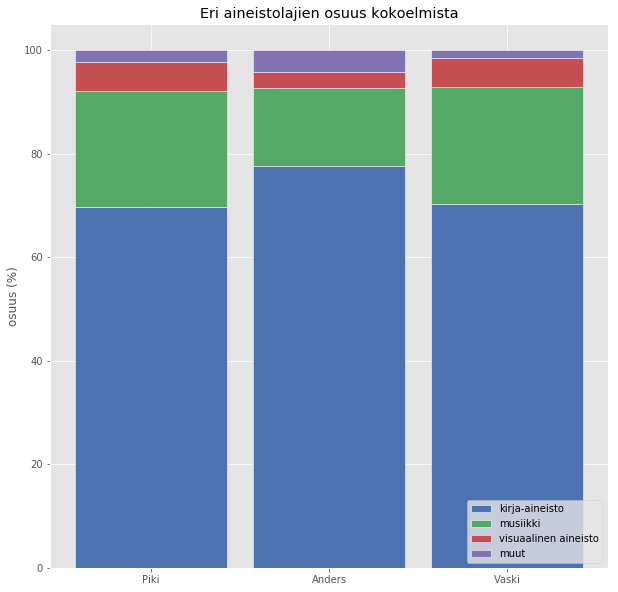

In [10]:
# BK, MU, VM ja MUUT

# Indeksit: PIKI, ANDERS, VASKI

r = [0, 1, 2]
raw_data = {'BK': [346414, 233323, 433577],
            'MU': [111546, 45548, 140145],
            'VM': [27709, 9041, 34780],
            'MUUT': [(4113+3691+3141+524), (9041+1405+991+679+595), (3482+2332+2110+1121)]}
df = pd.DataFrame(raw_data)

def aineistolajienOsuudet(df):
    # From raw value to percentage
    totals = [i+j+k+l for i,j,k,l in zip(df['BK'], df['MU'], df['VM'], df['MUUT'])]
    BKBars = [i / j * 100 for i,j in zip(df['BK'], totals)]
    MUBars = [i / j * 100 for i,j in zip(df['MU'], totals)]
    VMBars = [i / j * 100 for i,j in zip(df['VM'], totals)]
    MUUTBars = [i / j * 100 for i,j in zip(df['MUUT'], totals)]

    # plot
    barWidth = 0.85
    names = ('Piki','Anders','Vaski')
    plt.figure(figsize=(10,10))
    plt.style.use('seaborn-deep')
    # Create BK Bars
    plt.bar(r, BKBars, edgecolor='white', width=barWidth, label='kirja-aineisto')
    # Create MU Bars
    plt.bar(r, MUBars, bottom=BKBars, edgecolor='white', width=barWidth, label='musiikki')
    # Create VM Bars
    plt.bar(r, VMBars, bottom=[i+j for i,j in zip(BKBars, MUBars)], edgecolor='white', width=barWidth, label='visuaalinen aineisto')
    # Create MUUT Bars
    plt.bar(r, MUUTBars, bottom=[i+j+k for i,j,k in zip(BKBars, MUBars, VMBars)],  edgecolor='white', width=barWidth, label='muut')

    # Custom x axis
    plt.xticks(r, names)
    plt.ylabel("osuus (%)")
    plt.legend(loc='lower right')
    plt.title("Eri aineistolajien osuus kokoelmista")

    # Save it
    plt.savefig("aineistolajit_osuudet.svg")

    # Show graphic
    plt.show()

    
def aineistolajienMaarat(df):
    # plot
    barWidth = 0.85
    names = ('Piki','Anders','Vaski')
    plt.figure(figsize=(10,10))
    plt.style.use('ggplot')
    # Create BK Bars
    plt.bar(r, df['BK'], edgecolor='white', width=barWidth, label='kirja-aineisto')
    # Create MU Bars
    plt.bar(r, df['MU'], bottom=df['BK'], edgecolor='white', width=barWidth, label='musiikki')
    # Create VM Bars
    plt.bar(r, df['VM'], bottom=[i+j for i,j in zip(df['BK'], df['MU'])], edgecolor='white', width=barWidth, label='visuaalinen aineisto')
    # Create MUUT Bars
    plt.bar(r, df['MUUT'], bottom=[i+j+k for i,j,k in zip(df['BK'], df['MU'], df['VM'])],  edgecolor='white', width=barWidth, label='muut')

    # Custom x axis
    plt.xticks(r, names)
    plt.ylabel("osuus (%)")
    plt.legend(loc='lower right')
    plt.title("Eri aineistolajien määrä kokoelmissa")

    # Save it

    #plt.savefig("aineistolajit_maara.svg")

    # Show graphic
    plt.show()

    
aineistolajienOsuudet(df)

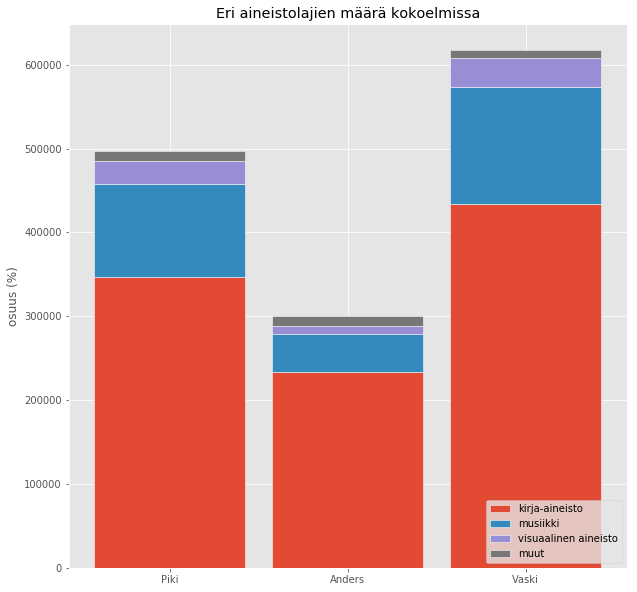

In [15]:
# BK, MU, VM ja MUUT

# Indeksit: PIKI, ANDERS, VASKI
    
aineistolajienMaarat(df)

Edellisistä kaavioista versio, jossa mukana kunkin kannan se aineisto, joka *ei yhdistynyt mihinkään*.

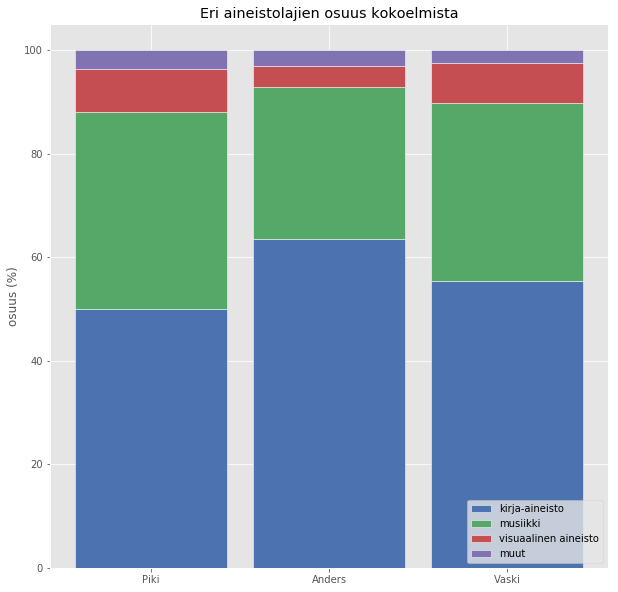

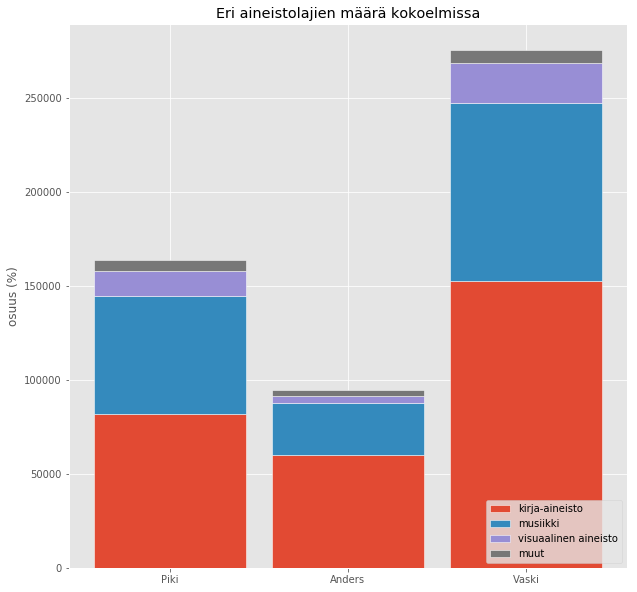

In [12]:
# BK, MU, VM ja MUUT

# Indeksit: PIKI, ANDERS, VASKI

r = [0, 1, 2]
raw_data = {'BK': [81930, 60075, 152955],
            'MU': [62680, 27770, 94710],
            'VM': [13485, 3878, 21359],
            'MUUT': [(2400+1948+1128+523), (1298+595+509+438), (2737+1562+1248+1120)]}
df = pd.DataFrame(raw_data)

aineistolajienOsuudet(df)
aineistolajienMaarat(df)

Edellisistä kaavioista versio, jossa mukana kunkin kannan se aineisto, joka *ei yhdistynyt muihin yleisiin kirjastoihin*.

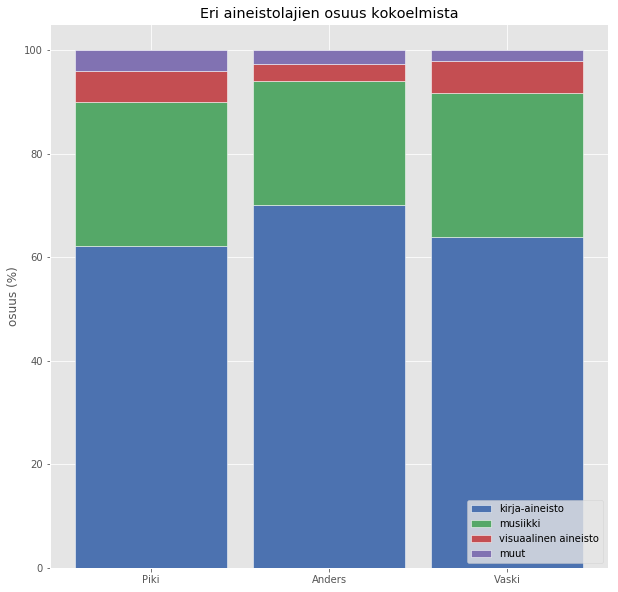

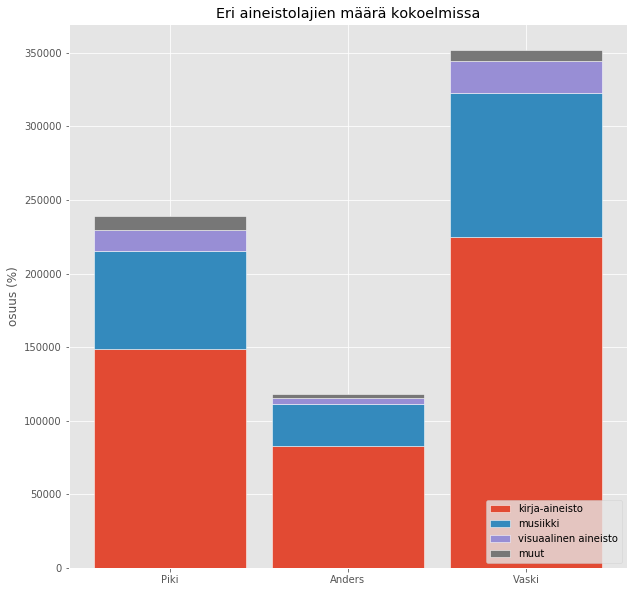

In [16]:
# BK, MU, VM ja MUUT

# Indeksit: PIKI, ANDERS, VASKI

r = [0, 1, 2]
raw_data = {'BK': [148609, 82931, 224898],
            'MU': [66890, 28445, 97904],
            'VM': [14074, 3964, 21679],
            'MUUT': [(3578+3231+2450+523), (1319+641+595+517), (2803+1838+1676+1120)]}
df = pd.DataFrame(raw_data)

aineistolajienOsuudet(df)
aineistolajienMaarat(df)